# Short Program and Written Reflection 1
**Name:**       Krishna Priya Nimmagadda\
**Student ID:** 300595605


### Creating the Corpus

**Proposed Corpus:**
A corpus consisting of ten individual `.txt` files, each containing text data from the newest discussion posts on *r/VALORANT*. *VALORANT* is a popular free-to-play 5v5, character-based tactical shooter developed by Riot Games. Analyzing discussions on this subreddit provides insights into community trends, player feedback, and favorite aspects of the game, potentially assisting Riot Games in future development.

**Logical Connection:**
All texts are categorized under the "Dicussion" tag to ensure they are focused on players' opinions, game insights and other topics. This similarity creates a cohesive corpus, suitable for analyzing trends and community dynamics in the game's player base. 

### Developing a Program to Load Texts into Python

The files are stored on my GitHub repository and will be accessed via the following URL: \
https://github.com/krishnapriya-n/valorant-reddit/blob/main/valorant_reddit.zip

**Required Libraries**

In [34]:
# Importing the required libraries
import requests
import zipfile
import os
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

**Download and Extract the Corpus**

In [2]:
# URL of the ZIP file
url = 'https://github.com/krishnapriya-n/valorant-reddit/raw/main/valorant_reddit.zip'
output_file = 'valorant_reddit.zip'

# Download the file using requests with error handling
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad responses
    with open(output_file, 'wb') as file:
        file.write(response.content)
    print("Download successful!")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")

# Extract the ZIP file
corpus_folder = 'valorant_corpus'
if not os.path.exists(corpus_folder):
    with zipfile.ZipFile(output_file, 'r') as zip_ref:
        zip_ref.extractall(corpus_folder)
    print("Extraction successful!")
else:
    print("Corpus folder already exists.")

Download successful!
Corpus folder already exists.


**Validate and Load the Text Files**

In [3]:
# List and validate extracted .txt files
extracted_files = [file for file in os.listdir(corpus_folder) if file.endswith(".txt")]

if extracted_files:
    print(f"Found {len(extracted_files)} text files.")
else:
    print("No text files found in the corpus folder. Please check the extraction process.")

# Initialize a dictionary to store the texts
corpus_texts = {}

# Read each .txt file dynamically
for filename in extracted_files:
    file_path = os.path.join(corpus_folder, filename)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            corpus_texts[filename] = file.read()
    except IOError as e:
        print(f"Error reading {filename}: {e}")

# Verify successful reading of the corpus
if corpus_texts:
    print(f"\nSuccessfully loaded {len(corpus_texts)} files into the corpus dictionary.")
else:
    print("\nNo files were loaded. Please check for errors.")

Found 10 text files.

Successfully loaded 10 files into the corpus dictionary.


### Creating an NLTK Corpus

An NLTK Corpus is created using NLTK functions. `PlaintextCorpusReader` is the reader being used here for corpis that consists of the plaintext documents.

In [4]:
# Create an NLTK corpus from the extracted .txt files
corpus = PlaintextCorpusReader(corpus_folder, r'.*\.txt')

# Print sample content from the first file to confirm readability
sample_file = corpus.fileids()[0]
print(f"\nContent of {sample_file} (first 50 characters):\n", corpus.raw(sample_file)[:50])


Content of text1.txt (first 50 characters):
 another idea.. texture packs..

well after a bunch


The program successfully downloaded, extracted and processed the corpus. The corpus is ready for further analysis using NLTK tools.

### Basic Metrics

The following metrics are calculated for the corpus:
- Total tokens and types in the entire corpus
- Total tokens and types in each text
- Average number of types and tokens across the texts
- Lexical diversity of the texts

**Tokens** represent the total number of words.\
**Types** represent the total number of unique words.\
**Lexical Diversity** is the ratio of types to tokens. A higher ratio implies a more diverse vocabulary used in the text, whereas a lower ratio suggests more repetative language.

In [5]:
# Function to compute tokens and types for a single text
def get_tokens_and_types(text):
    tokens = corpus.words(text)  # Get the tokens for the text
    types = set(tokens)          # Get unique words (types)
    return tokens, types

# 1. Total tokens and types in the entire corpus
all_tokens = corpus.words()
all_types = set(all_tokens)

# 2. Total tokens and types for each text
text_metrics = {}
for file_id in corpus.fileids():
    tokens, types = get_tokens_and_types(file_id)
    text_metrics[file_id] = {
        'tokens': len(tokens),
        'types': len(types)
    }

# 3. Average number of tokens and types across all texts
total_tokens = sum([metrics['tokens'] for metrics in text_metrics.values()])
total_types = sum([metrics['types'] for metrics in text_metrics.values()])
num_texts = len(text_metrics)

avg_tokens = total_tokens / num_texts
avg_types = total_types / num_texts

# 4. Lexical diversity of the entire corpus
lexical_diversity = len(all_types) / len(all_tokens)

# Print the results
print(f"Total tokens in the entire corpus: {len(all_tokens)}")
print(f"Total types in the entire corpus: {len(all_types)}\n")

print("Tokens and Types for each text:")
for file_id, metrics in text_metrics.items():
    print(f"{file_id}: Tokens = {metrics['tokens']}, Types = {metrics['types']}")

print(f"\nAverage number of tokens per text: {avg_tokens:.2f}")
print(f"Average number of types per text: {avg_types:.2f}")
print(f"Lexical diversity of the entire corpus: {lexical_diversity:.4f}")

Total tokens in the entire corpus: 2146
Total types in the entire corpus: 784

Tokens and Types for each text:
text1.txt: Tokens = 119, Types = 85
text10.txt: Tokens = 442, Types = 210
text2.txt: Tokens = 164, Types = 105
text3.txt: Tokens = 266, Types = 147
text4.txt: Tokens = 75, Types = 52
text5.txt: Tokens = 226, Types = 140
text6.txt: Tokens = 256, Types = 143
text7.txt: Tokens = 102, Types = 80
text8.txt: Tokens = 68, Types = 54
text9.txt: Tokens = 428, Types = 227

Average number of tokens per text: 214.60
Average number of types per text: 124.30
Lexical diversity of the entire corpus: 0.3653


#### Results

**Total tokens and types in the entire corpus:** \
There are 2146 words in total across all the texts, with 784 unique words in the entire corpus.

**Tokens and types for each text:** \
The number of tokens in each text ranges from 68 (in the shortest text) to 442 (in the longest text). The number of unique words (types) ranges from 52 to 227, with the highest vocabulary diversity in the longest text.

**Average number of tokens and types:** \
The average number of tokens per text is 214.60, indicating that the posts in the corpus are of short to medium length.\
The average number of types per text is 124.30, which suggests moderate variation in vocabulary across the posts.

**Lexical Diversity:** \
The lexical diversity of the entire corpus is 0.3653, meaning that about 36.5% of the words in the corpus are unique. This suggests that while the texts are somewhat repetitive, there is still a decent level of variation in the language used.

### Frequency Distributions

The frequency distributions of the types and tokens in the corpus is created using the `NLTK` library where the frequency of each word is calculated.

**Frequency distribution of types and tokens across the corpus:** \
This distribution represents the frequency of every word that appears in the corpus, including repetitions.

In [6]:
# Frequency distribution of all tokens in the entire corpus
all_tokens = corpus.words()
all_token_fd = FreqDist(all_tokens)

**Most frequent words in the corpus:** \
This distribution focuses on the unique words (types) that appear in the corpus, excluding repetitions.

In [7]:
# Frequency distribution of types (unique words) in the entire corpus
all_types = set(all_tokens)
all_type_fd = FreqDist(all_types)

# Print the 10 most common tokens in the entire corpus
print("10 Most Common Tokens in the Corpus:")
print(all_token_fd.most_common(10))

# Print the 10 most common types (unique words) in the entire corpus
print("\n10 Most Common Types in the Corpus:")
print(all_type_fd.most_common(10))

10 Most Common Tokens in the Corpus:
[('I', 68), ('.', 66), ('the', 55), (',', 54), ('and', 53), ('to', 50), ('a', 32), ('in', 31), ('is', 29), ('my', 28)]

10 Most Common Types in the Corpus:
[('unreasonable', 1), ('if', 1), ('encounter', 1), ('ragers', 1), ('lobby', 1), ('fair', 1), ('doing', 1), ('terms', 1), ('/', 1), ('getting', 1)]


**Most frequent words in individual texts:** \
The ten most frequent tokens (including common stopwords and punctuation) and unique types (distinct vocabulary) in the corpus are shown below.

In [8]:
# Frequency distribution for each text
text_frequency_distributions = {}
for file_id in corpus.fileids():
    text_tokens = corpus.words(file_id)
    text_fd = FreqDist(text_tokens)
    text_frequency_distributions[file_id] = text_fd

    # Print 5 most common words in the current text
    print(f"\n5 Most Common Words in {file_id}:")
    print(text_fd.most_common(5))


5 Most Common Words in text1.txt:
[('texture', 5), ('packs', 4), ('.', 4), (',', 4), ('..', 3)]

5 Most Common Words in text10.txt:
[('I', 16), ("'", 14), ('the', 14), (',', 13), ('and', 12)]

5 Most Common Words in text2.txt:
[(':', 16), (',', 5), ('please', 5), ('I', 3), ('’', 3)]

5 Most Common Words in text3.txt:
[('I', 15), ('my', 11), ('the', 9), ('have', 9), ('to', 8)]

5 Most Common Words in text4.txt:
[('i', 5), ('and', 4), ('you', 3), ('my', 3), ('followers', 2)]

5 Most Common Words in text5.txt:
[('I', 14), ('and', 8), ('to', 8), ('.', 8), ('a', 7)]

5 Most Common Words in text6.txt:
[('.', 13), ('i', 13), (',', 9), ('to', 8), ('this', 6)]

5 Most Common Words in text7.txt:
[('i', 5), ('/', 5), (',', 4), ('just', 3), ('.', 3)]

5 Most Common Words in text8.txt:
[('is', 5), ('are', 3), ('servers', 2), ('named', 2), ('after', 2)]

5 Most Common Words in text9.txt:
[('I', 19), ('.', 16), ('and', 15), ('the', 13), ('to', 11)]


**Infrequent words:** \
Words that appear only once across the entire corpus are considered infrequent. The following are the most infrequent words, appearing only once in the entire collection.

In [9]:
# Identify infrequent words (words that occur only once)
infrequent_words = [word for word, freq in all_token_fd.items() if freq == 1]
print("\nInfrequent Words (appear only once across the entire corpus):")
print(infrequent_words[:10])  # Display first 10 infrequent words


Infrequent Words (appear only once across the entire corpus):
['idea', 'bunch', 'traction', 'post', 'decided', 'thing', 'happen', 'made', 'overwolf', 'built']


#### Results

**Most Common Tokens in the Corpus:** \
The most common tokens in the corpus reflect common words, including personal pronouns and punctuation marks.\
Tokens like "I" (68), "." (66), "," (54), and "and" (53) occur frequently. These are likely to be common stopwords or punctuation that appear throughout the corpus, which are often used in conversational or informal writing.

**Most Common Types in the Corpus:** \
The types refer to unique words (distinct vocabulary) across the corpus.\
Types like "it", "way", "urge", "suggests", "nowhere" occur just once across the corpus. This suggests these could be key content words specific to a particular text or usage.

**Most Common Words in Individual Texts:** \
The most commonly occuring words in individual texts is printed out in the output above, which shows the range of each post and the different concerns/ discussion topics.

**Infrequent Words:** \
The words that appear only once in the entire corpus include "idea", "bunch", "traction", "decided". These could be more specific content words or domain-specific terms that appear infrequently, suggesting specialized discussions or unique references within certain texts.

### Preprocessing Techniques Affecting Corpus

Preprocessing is essential in natural language processing as it helps to clean and normalize the data. This makes it more suitable for further analysis. A few common preprocessing techniques are removing stop words and filtering words below a minimum frequency.

#### Removing Stop Words
**Description** \
Common words like "the", "is", "and", etc., which are frequently used in natural language without carrying any significant meaning by themselves are stop words. Removing these words can help focus on the other meaningful and contextual texts.\
This can be done in Python using the NLTK library.

In [10]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in all_tokens if word.lower() not in stop_words]

**Effect** \
By removing stop words, the remaining words in the corpus carry more meaningful content. After the stop words are filtered out, only the nouns, verbs, adjectives and adverbs remain. These are the words that carry more weight in the understanding of context or topics of the text.

**Interpretation** \
Removing stop words allows for a more meaningful analysis of the text. When performing tasks like topic modelling, clustering or word frequency analysis, the unique themes or topics will be revealed without the noise of the stop words. In the corpus being used, the more common words would be "texture", "pack" or something that relates to the game, rather than the stop words. 

#### Removing Low-Frequency Words

**Description** \
Removing low-frequency words refers to getting rid of words that appear less than a certain threshold of times in the corpus. This helps to remove rare or insignificant words.

In [13]:
min_freq = 3
filtered_tokens = [word for word, freq in all_token_fd.items() if freq >= min_freq]

**Effect** \
Removing low-frequency words would reduce the size of the vocabulary, leaving only those words that appear more frequently across the corpus. This would result in the text containing only terms that are likely to be more representative of the general themes.

**Interpretation** \
Low-frequency words are often specific words, incorrect words or noise. Removing them would ensure the analysis would focus on the most significant and relevant vocabulary. For a small corpus similar to the one used in this project, there are more disadvantages comparatively. Some specialized content or unique expressions may be lost when low-frequency words are discarded. This might cause the analysis to miss specific details. The corpus would be overly generalized without the low-frequency words, as the uncommon words might carry meaning in specific contexts.

#### Lowercasing

**Description** \
Converting all text to lowercase ensures that words such as "Valorant", "VALORANT", and "valorant" are all treated as the same word.

In [14]:
lowercased_tokens = [word.lower() for word in all_tokens]

**Effect** \
Lowercasing the text would reduce the number of unique tokens and ensures that the words are uniform in representation. 

**Interpretation** \
Lowercasing helps avoid counting the same word multiple times due to different capitalizations, which simplifies the corpus and improves consistency for analysis, especially in tasks like frequency analysis or machine learning.

#### Spelling Correction

**Description** \
Correcting mispelled words in the text would standardize spelling across the corpus. 

In [18]:
from spellchecker import SpellChecker
spell = SpellChecker()
corrected_tokens = [spell.correction(word) for word in all_tokens]

**Effect** \
Human errors in typing can lead to inconsistencies in word forms. Correcting spelling ensures uniform representation of words throughout the corpus.

**Interpretation** \
Spelling errors are a common cause of inconsistencies and errors in analysis. By standardizing spelling, we ensure that similar words are grouped together. However, this may occasionally alter the original meaning or context of the text if the corrections are not contextually appropriate.

A few other techniques include (but are not limited to) the following:
- **Stemming**: Reducing a word to its root (e.g., "running" becomes "run"
- **Lemmatization**: Similar to stemming, but more advanced (e.g., "better" becomes "good")
- **Removing Punctuation**: Punctuation might not add any significant meaning to the analysis (e.g., (, . ! ?))
- **Removing Non-Alphanumeric Characters**: Special characters and symbols might not add any significant meaning to the text. (e.g., ♥,•,○) 

### Unique Analysis Topic: Investigating Content Word Dominance Across Texts

**Objective:** Explore whether specific content words contribute significantly to the lexical diversity across different texts. Specifically, analyze if certain high-frequency content words dominate the vocabulary or if unique content words are evenly distributed across the texts.

To find the lexical diversity across texts, the type/token ratio (TTR) will be calculated for each text in the corpus. This would give the base idea of the vocabulary diversity for each text and whether longer texts have a lower ratio of unique types to tokens, which suggests less diversity.

**Formula:** $$ TTR = \frac{\text{Number of Unique Words (Types)}}{\text{Total Number of Words (Tokens)}}$$

**Hypothesis:** Longer texts tend to have lower lexical diversity due to increased repetition of functional words (like "the," "and," "of"). We will test this by comparing overall TTR with TTR calculated after removing common stopwords.

A program is created to calculate the TTR for each text and analyze how the TTR correlates with the document length.

In [36]:
stop_words = set(stopwords.words('english'))

# Dictionaries to store results
text_lexical_diversity = {}
filtered_lexical_diversity = {}

# Calculate TTR with and without stopwords
for file_id in corpus.fileids():
    tokens = [word.lower() for word in corpus.words(file_id) if word.isalpha()]
    
    # Overall TTR
    types = set(tokens)
    lexical_diversity_text = len(types) / len(tokens) if tokens else 0
    text_lexical_diversity[file_id] = lexical_diversity_text
    
    # TTR excluding stopwords
    content_tokens = [word for word in tokens if word not in stop_words]
    filtered_types = set(content_tokens)
    lexical_diversity_filtered = len(filtered_types) / len(content_tokens) if content_tokens else 0
    filtered_lexical_diversity[file_id] = lexical_diversity_filtered

# Print the overall TTR
print("\nOverall Lexical Diversity for Each Text:")
for file_id, diversity in text_lexical_diversity.items():
    print(f"{file_id}: Lexical Diversity = {diversity:.4f}")

# Print the filtered TTR (without stopwords)
print("\nFiltered Lexical Diversity (without stopwords) for Each Text:")
for file_id, diversity in filtered_lexical_diversity.items():
    print(f"{file_id}: Filtered Lexical Diversity = {diversity:.4f}")


Overall Lexical Diversity for Each Text:
text1.txt: Lexical Diversity = 0.7857
text10.txt: Lexical Diversity = 0.4924
text2.txt: Lexical Diversity = 0.7193
text3.txt: Lexical Diversity = 0.5413
text4.txt: Lexical Diversity = 0.6806
text5.txt: Lexical Diversity = 0.6103
text6.txt: Lexical Diversity = 0.5735
text7.txt: Lexical Diversity = 0.8313
text8.txt: Lexical Diversity = 0.7931
text9.txt: Lexical Diversity = 0.5335

Filtered Lexical Diversity (without stopwords) for Each Text:
text1.txt: Filtered Lexical Diversity = 0.7619
text10.txt: Filtered Lexical Diversity = 0.7167
text2.txt: Filtered Lexical Diversity = 0.7639
text3.txt: Filtered Lexical Diversity = 0.7931
text4.txt: Filtered Lexical Diversity = 0.8286
text5.txt: Filtered Lexical Diversity = 0.8621
text6.txt: Filtered Lexical Diversity = 0.8000
text7.txt: Filtered Lexical Diversity = 0.9362
text8.txt: Filtered Lexical Diversity = 0.9118
text9.txt: Filtered Lexical Diversity = 0.7474


#### Results

The results of lexical diversity for each text is given in the output above. 

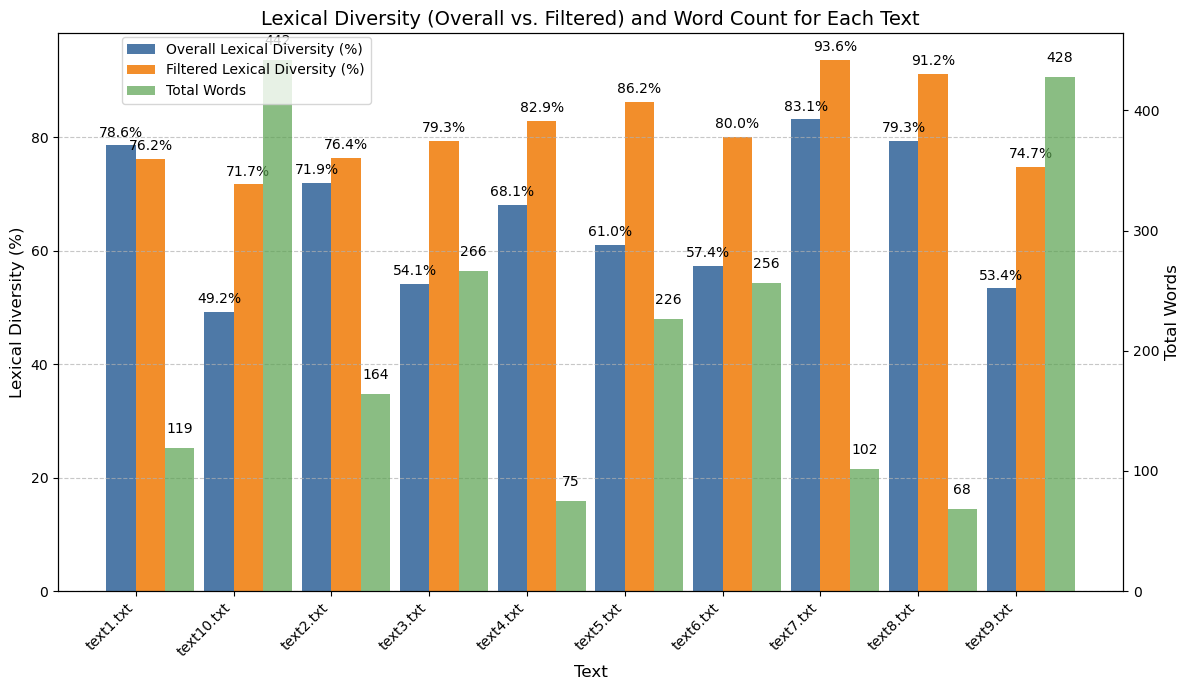

In [38]:
# Convert data to percentages and get word counts
texts = list(text_lexical_diversity.keys())
overall_diversities = [val * 100 for val in text_lexical_diversity.values()]  # Overall TTR in %
filtered_diversities = [val * 100 for val in filtered_lexical_diversity.values()]  # Filtered TTR in %
word_counts = [len(corpus.words(file_id)) for file_id in corpus.fileids()]  # Total words in each text

# Define bar width and positions
bar_width = 0.3
index = np.arange(len(texts))

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot lexical diversities
ax1.bar(index, overall_diversities, bar_width, label='Overall Lexical Diversity (%)', color='#4E79A7')
ax1.bar(index + bar_width, filtered_diversities, bar_width, label='Filtered Lexical Diversity (%)', color='#F28E2B')

# Add labels and title for the first y-axis
ax1.set_xlabel('Text', fontsize=12)
ax1.set_ylabel('Lexical Diversity (%)', fontsize=12, color='black')
ax1.set_title('Lexical Diversity (Overall vs. Filtered) and Word Count for Each Text', fontsize=14)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(texts, rotation=45, ha='right')

# Display values on top of lexical diversity bars
for i, (overall, filtered) in enumerate(zip(overall_diversities, filtered_diversities)):
    ax1.text(i, overall + 1, f'{overall:.1f}%', ha='center', va='bottom', fontsize=10)
    ax1.text(i + bar_width, filtered + 1, f'{filtered:.1f}%', ha='center', va='bottom', fontsize=10)

# Create a second y-axis for word count
ax2 = ax1.twinx()
ax2.bar(index + 2 * bar_width, word_counts, bar_width, label='Total Words', color='#59A14F', alpha=0.7)
ax2.set_ylabel('Total Words', fontsize=12, color='black')

# Display values on top of word count bars
for i, count in enumerate(word_counts):
    ax2.text(i + 2 * bar_width, count + 10, f'{count}', ha='center', va='bottom', fontsize=10)

# Add combined legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95), fontsize=10)

# Add grid lines for better readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

The chart above demonstrates the percentage of overall lexical diversity (orange) compared to the filtered lexical diversity (blue). This is shown against the total words for each text, and it is seen that the overall lexical diversity is quite high in all of them. This means that the words used are diverse, and for smaller texts such as text4.txt and text7.txt, the unique word count is higher compared to a larger text. This is a common noticable trend as longer texts tend to have repeated words.

### Conclusion

By analyzing the types and tokens within the corpus, a notable relationship between the frequency distribution of words and the overall structure of the text is noticed. The corpus displayed a high number of tokens compared to types, which aligns with the expectations of a natural language corpus. This indicates that the corpus has a good amount of repeated words, which are likely due to stopwords or common functional words which dominate the text.

The frequency distribution revealed some patterns, with a few words appearing more frequently than the others. After removing the stopwords, the type-token ratio (TTR) increased, which suggests that once the uninformative words were excluded, the corpus presented a more diverse vocabulary. This displays the importance of filtering stopwords when analyzing linguistic diversity. Examining the infrequent words reveals the more unique aspects of the text. Many of the infrequent words are either domain-specific or insignificant words, which requires further exploration to assess.

The lexical diversity analyzing after filtering stopwords provided deeper insights into the unique vocabulary of the corpus. The TTR offered a clear picture of the linguist process, as the stopwords were no longer creating a noise in the diversity. By focusing on more meaningful words, it is evident that vocabulary distribution varies depending on the structure and intent of the text.

While the analysis provided valuable insights, there are still areas that could be further explored. The corpus would need a larger number of text files data to gain a more clear understanding on the trends and similarities. With more varied text types, including technical documents and creative writings, the word distribution and its changes would be uncovered. Additionally some challenges remain in understanding the role of certain rare words and their context in the corpus.

In the future, it would be useful to expand the corpus by adding more categories of words by text files (posts from the subreddit) to gain a more comprehensive understanding of the text. Furthermore, future analyses could explore the semantic relationships between words or focus on sentence structure to deepend the understanding of how language is used in the corpus.